In [1]:
library (deSolve) 

In [2]:
#In this code we model the corona virus!

In [3]:
seir_model = function (current_timepoint, state_values, parameters)
{
  # create state variables (local variables)
  S = state_values [1]        # susceptibles
  E = state_values [2]        # exposed
  I = state_values [3]        # infectious
  R = state_values [4]        # recovered
  
  with ( 
    as.list (parameters),     # variable names within parameters can be used 
         {
           # compute derivatives
           dS = (-beta * S * I)
           dE = (beta * S * I) - (delta * E)
           dI = (delta * E) - (gamma * I)
           dR = (gamma * I)
           
           # combine results
           results = c (dS, dE, dI, dR)
           list (results)
         }
    )
}

In [4]:
contact_rate = 10                     # number of contacts per day
transmission_probability = 0.07       # transmission probability
infectious_period = 5                 # infectious period
latent_period = 14                     # latent period

In [5]:
beta_value = contact_rate * transmission_probability
gamma_value = 1 / infectious_period
delta_value = 1 / latent_period

In [6]:
Ro = beta_value / gamma_value

In [7]:
W = 1000       # susceptible hosts
X = 1           # infectious hosts
Y = 0           # recovered hosts
Z = 20           # exposed hosts

In [8]:
N = W + X + Y + Z

In [9]:
N

[1] 10000

In [10]:
initial_values = c (S = W/N, E = X/N, I = Y/N, R = Z/N)

In [11]:
timepoints = seq (0, 50, by=1)

In [12]:
output = lsoda (initial_values, timepoints, seir_model, parameter_list)

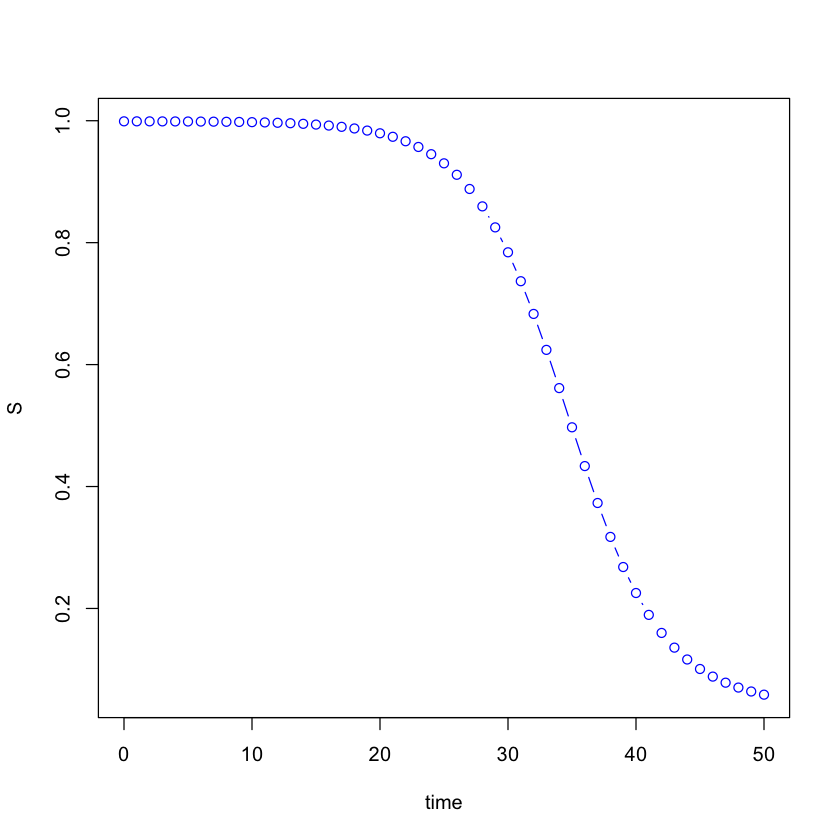

In [13]:
plot (S ~ time, data = output, type='b', col = 'blue')       

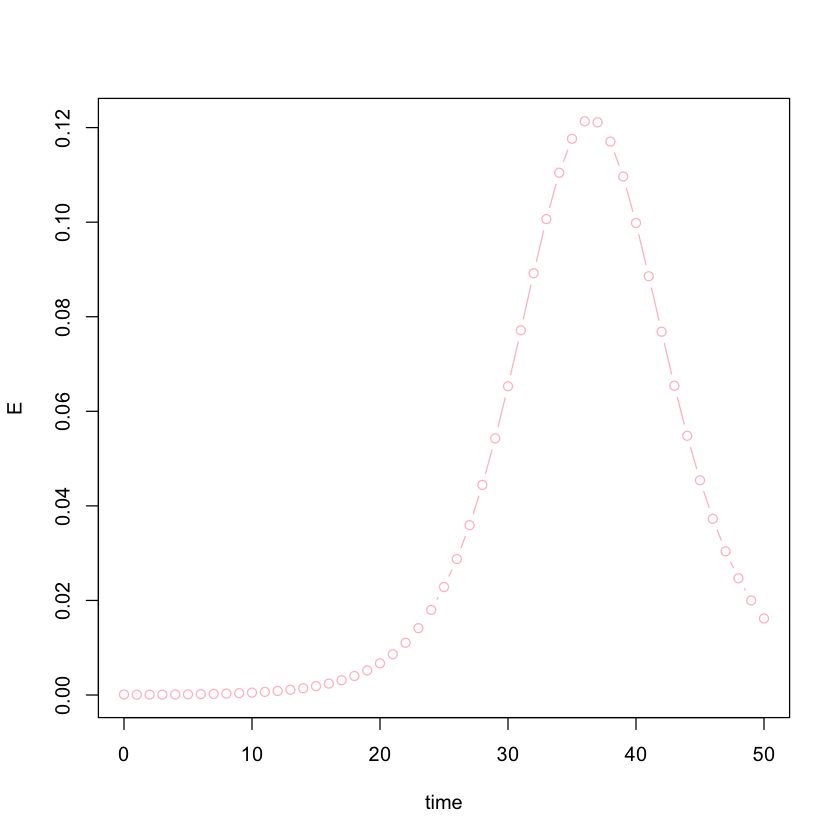

In [14]:
plot (E ~ time, data = output, type='b', col = 'pink')  

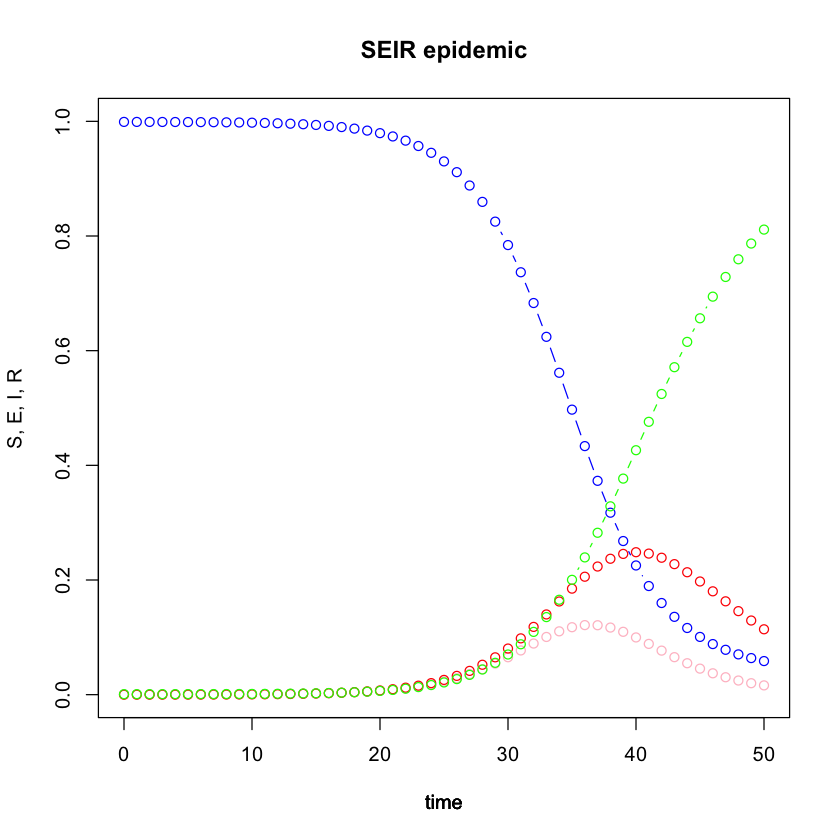

In [17]:
# susceptible hosts over time
plot (S ~ time, data = output, type='b', ylim = c(0,1), col = 'blue', ylab = 'S, E, I, R', main = 'SEIR epidemic') 

# remain on same frame
par (new = TRUE)    

# exposed hosts over time
plot (E ~ time, data = output, type='b', ylim = c(0,1), col = 'pink', ylab = '', axes = FALSE)

# remain on same frame
par (new = TRUE) 

# infectious hosts over time
plot (I ~ time, data = output, type='b', ylim = c(0,1), col = 'red', ylab = '', axes = FALSE) 

# remain on same frame
par (new = TRUE)  

# recovered hosts over time
plot (R ~ time, data = output, type='b', ylim = c(0,1), col = 'green', ylab = '', axes = FALSE)
